In [3]:
import numpy

In [5]:
a = numpy.zeros( [3,2] )
print(a)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [14]:
a[0,0] = 1
a[0,1] = 3
a[1,0] = 2
a[2,0] = 6
a[2,1] = 2

In [6]:
import matplotlib.pyplot

In [8]:
#Para abrir os gráficos aqui e não em outra janela
%matplotlib inline

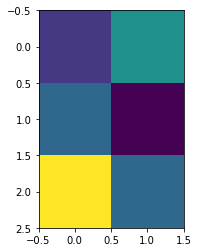

In [15]:
matplotlib.pyplot.imshow(a, interpolation="nearest")

In [42]:
#Para a sigmoid function - expit(x)
import scipy.special

In [43]:
class neuralNetwork:
        
        #Inicializar a rede neural
        def __init__(self, inputNodes, hiddenNodes, outputNodes, learningRate):
            self.inodes = inputNodes
            self.hnodes = hiddenNodes
            self.onodes = outputNodes
            
            #Criando o peso das ligações com o 1/raiz(num of incoming links) com uma distribuição normal
            self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
            self.who = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.onodes, self.hnodes))
            
            self.lr = learningRate
            
            #Inicializando a função de sigmoid, a função de ativação
            self.activation_function = lambda x: scipy.special.expit(x)
            
            pass
        
        #Treinar a rede neural
        def train(self, inputs_list, targets_list):
            inputs = numpy.array(inputs_list, ndmin=2).T
            targets = numpy.array(targets_list, ndmin = 2).T
             
            hidden_inputs = numpy.dot(self.wih, inputs)
            
            hidden_outputs = self.activation_function(hidden_inputs)
            
            final_inputs = numpy.dot(self.who, hidden_outputs)
            
            final_outputs = self.activation_function(final_inputs)
            #-----------#
            
            targets = numpy.array(targets_list, ndmin=2).T
            
            #error is the (target - actual)
            output_errors = targets - final_outputs
            
            #hidden layer error
            hidden_errors = numpy.dot(self.who.T, output_errors)
            
            #atualizar os pesos entre hidden e output layers
            self.who += self.lr * numpy.dot((output_errors * final_outputs * (1 - final_outputs)), numpy.transpose(hidden_outputs))
            
            #atualizar os pesos entre hidden e input layers
            self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1 - hidden_outputs)), numpy.transpose(inputs))

            
            pass
        
        #Dar uma resposta, dada uma entrada
        def query(self, inputs_list):
            #Converter inputs list para array 2d, esse T é de transposta
            inputs = numpy.array(inputs_list, ndmin=2).T
            
            #Multiplicar a matriz de peso entre input e hidden com os inputs, para ter os inputs do hidden
            hidden_inputs = numpy.dot(self.wih, inputs)
            
            #Calculando os sinais de saida da função de ativação
            hidden_outputs = self.activation_function(hidden_inputs)
            
            final_inputs = numpy.dot(self.who, hidden_outputs)
            
            final_outputs = self.activation_function(final_inputs)
            
            return final_outputs

In [127]:
inputNodes = 3
hiddenNodes = 3
outputNodes = 3

learningRate = 0.3

n = neuralNetwork(inputNodes, hiddenNodes, outputNodes, learningRate)

In [128]:
n.query([1.0, 0.5, -1.5])

array([[0.83035115],
       [0.40400917],
       [0.54721054]])

In [159]:
n.train([1.0, 0.5, -1.5], [0.8, 0.2, 0.5])

In [160]:
n.query([1.0, 0.5, -1.5])

array([[0.8345067 ],
       [0.34258593],
       [0.53671367]])

In [15]:
data_file = open('mnist_dataset/mnist_train_100.csv','r')
data_list = data_file.readlines()
data_file.close()

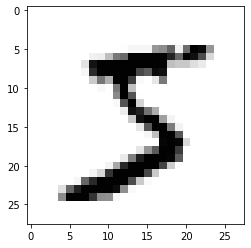

In [23]:
import numpy
import matplotlib.pyplot
%matplotlib inline


all_values = data_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [32]:
#Tratando os dados para valores corretos para a função de ativação

#números da imagem de 0 a 255 para 0.01 até 0.99
scaled_input = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
#print(scaled_input)

#números esperados no output para determinado imagem, entre 0.01 até 0.99 sendo este o número correspondente
onodes = 10
targets = numpy.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99
print(targets)

[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]


In [50]:
inputNodes = 784
hiddenNodes = 100
outputNodes = 10

learningRate = 0.3

n = neuralNetwork(inputNodes, hiddenNodes, outputNodes, learningRate)

In [68]:
training_data_file = open('mnist_dataset/mnist_train_100.csv', 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [69]:
#Treinar a rede neural
for record in training_data_list:
    all_values = record.split(',')
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = numpy.zeros(outputNodes)+ 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [78]:
#Teste
test_data_file = open('mnist_dataset/mnist_test_10.csv', 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [87]:
all_values = test_data_list[0].split(',')
print(all_values[0])

7


In [88]:
n.query((numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01)

array([[0.07991148],
       [0.01316422],
       [0.04638198],
       [0.07522082],
       [0.0638986 ],
       [0.02936922],
       [0.00394709],
       [0.80527273],
       [0.07015052],
       [0.03466376]])

In [90]:
#Testar e analisar

scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    
    correct_label = int(all_values[0])
    print(correct_label, 'correct_label')
    
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    
    label = numpy.argmax(outputs)
    print(label, 'Network`s answer')
    
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
    
    pass
print(scorecard)
scorecard_array = numpy.asarray(scorecard)
print ('Perfomance = ', scorecard_array.sum() / scorecard_array.size)

7 correct_label
7 Network`s answer
2 correct_label
0 Network`s answer
1 correct_label
1 Network`s answer
0 correct_label
0 Network`s answer
4 correct_label
4 Network`s answer
1 correct_label
1 Network`s answer
4 correct_label
4 Network`s answer
9 correct_label
4 Network`s answer
5 correct_label
4 Network`s answer
9 correct_label
7 Network`s answer
[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]
Perfomance =  0.6
